In [44]:
import numpy as np
from tensorflow.keras.models import Sequential # 순차적 모델을 생성하기 위한 모듈
from tensorflow.keras.layers import Dense # 밀집층(fully connected layer)을 추가하기 위한 모듈
from sklearn.model_selection import train_test_split# 데이터를 학습/테스트 세트로 나누기 위한 모듈
from sklearn.datasets import make_classification # 예제 데이터셋 생성 모듈
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

In [10]:
X, y = make_classification(
    n_samples=1000, # 데이터 샘플 수
    n_features=20, # 특징(특성) 수
    n_classes=2, # 클래스 수 (이진 분류)
    random_state=42  # 랜덤 시드 고정 (결과 재현 가능성 보장)
)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)), # 첫 번째 은닉층
    Dense(8, activation='relu'), # 두 번째 은닉층
    Dense(1, activation='sigmoid') # 출력층 (이진 분류에서 사용)
])

d:\0_CodeFile\PythonProject\SK_rookies26\02_ml,dl_project\tensor_proj\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(
    optimizer='adam', # 학습 속도를 조정하며 손실 함수의 최솟값을 찾습니다.
    loss='binary_crossentropy', # 이진 분류에서 자주 사용되는 손실 함수
    metrics=['accuracy'] # 학습 성과를 평가할 지표
)


In [14]:
history = model.fit(
    X_train, y_train, # 학습용 데이터와 레이블
    validation_split=0.2, # 검증 데이터 비율 (학습 데이터의 20%)
    epochs=10, # 학습 반복 횟수
    batch_size=32, # 한 번의 학습에서 사용하는 데이터 샘플 수
    verbose=1           # 학습 진행 상태를 출력
)


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4979 - loss: 0.7547 - val_accuracy: 0.5125 - val_loss: 0.6900
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5025 - loss: 0.6857 - val_accuracy: 0.5188 - val_loss: 0.6425
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5122 - loss: 0.6578 - val_accuracy: 0.5562 - val_loss: 0.6061
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5661 - loss: 0.6056 - val_accuracy: 0.6250 - val_loss: 0.5709
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5978 - loss: 0.5846 - val_accuracy: 0.6938 - val_loss: 0.5359
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6838 - loss: 0.5443 - val_accuracy: 0.7437 - val_loss: 0.5024
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7676 - loss: 0.5099 - val_accuracy: 0.7812 - val_loss: 0.4679
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7790 - loss: 0.4823 - val_accuracy: 0.8313 - val_loss:

In [15]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"테스트 손실: {test_loss:.4f}, 테스트 정확도: {test_accuracy:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7938 - loss: 0.4712 
테스트 손실: 0.4759, 테스트 정확도: 0.8000


In [16]:
predictions = model.predict(X_test[:5]) # 테스트 데이터 중 5개의 샘플 예측
print("예측 결과:", predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
예측 결과: [[0.7236289 ]
 [0.6168604 ]
 [0.36716196]
 [0.55826205]
 [0.6300857 ]]


In [25]:
# 1. 데이터 생성
# 이진 분류를 위한 가상 데이터셋 생성
X, y=make_classification(n_samples=1000, n_features=20,    
n_informative=15, n_redundant=5, random_state=42)

In [26]:
# 2. 데이터 분할
# (1) 전체 데이터를 훈련 데이터와 임시 데이터로 나눔 (훈련 70%, 나머지 30%)
X_train, X_temp, y_train, y_temp=train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
# (2) 나머지 데이터를 검증 데이터와 테스트 데이터로 나눔 (각각 15%씩)
X_val, X_test, y_val, y_test=train_test_split( X_temp, y_temp, test_size=0.5, random_state=42)
# 3. 각 데이터셋 크기 확인
print("훈련 데이터 크기:", X_train.shape, y_train.shape) # 약 70%의 데이터
print("검증 데이터 크기:", X_val.shape, y_val.shape) # 약 15%의 데이터
print("테스트 데이터 크기:", X_test.shape, y_test.shape) # 약 15%의 데이터


훈련 데이터 크기: (700, 20) (700,)
검증 데이터 크기: (150, 20) (150,)
테스트 데이터 크기: (150, 20) (150,)


In [32]:
# 데이터 정규화 (특성 스케일링)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)
X_test=scaler.transform(X_test)
# 2. 모델 설계
# 입력층, 은닉층, 출력층으로 구성된 이진 분류 모델
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)), # 입력층
    tf.keras.layers.Dense(64, activation='relu'), # 첫 번째 은닉층
    tf.keras.layers.Dropout(0.5), # 과적합 방지를 위한 Dropout
    tf.keras.layers.Dense(32, activation='relu'), # 두 번째 은닉층
    tf.keras.layers.Dense(1, activation='sigmoid') # 출력층 (Sigmoid 활성화 함수)
])

In [33]:
# 손실 함수: Binary Cross-Entropy
# 최적화 알고리즘: Adam
# 평가지표: Accuracy
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
# 4. Early Stopping 설정
# 검증 데이터 손실이 개선되지 않으면 학습을 조기에 종료
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
patience=5, restore_best_weights=True)

In [35]:
 # 5. 모델 훈련
history=model.fit(X_train, y_train, 
    validation_data=(X_val, y_val), 
    epochs=50, 
    batch_size=32, 
    callbacks=[early_stopping])

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4932 - loss: 0.7622 - val_accuracy: 0.6867 - val_loss: 0.6159
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6822 - loss: 0.6251 - val_accuracy: 0.8333 - val_loss: 0.5311
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7572 - loss: 0.5372 - val_accuracy: 0.8533 - val_loss: 0.4579
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7850 - loss: 0.4973 - val_accuracy: 0.8533 - val_loss: 0.3977
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8297 - loss: 0.4385 - val_accuracy: 0.8800 - val_loss: 0.3429
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8253 - loss: 0.3932 - val_accuracy: 0.8733 - val_loss: 0.3081
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8454 - loss: 0.3794 - val_accuracy: 0.8800 - val_loss: 0.2770
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8618 - loss: 0.3635 - val_accuracy: 0.8800 - val_loss:

In [36]:
# 6. 모델 평가
# 테스트 데이터로 성능 평가
test_loss, test_accuracy=model.evaluate(X_test, y_test)
print(f"TestLoss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9476 - loss: 0.1754 
TestLoss: 0.1458, Test Accuracy: 0.9533


In [37]:
# 7. 예측
# 새로운 데이터에 대한 예측 수행
predictions=model.predict(X_test)
predicted_classes=(predictions>0.5).astype(int) # 0.5를 기준으로 클래스 결정

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [39]:
# 8. 분류 보고서 출력
# 실제 값과 예측 값을 비교하여 성능 지표 확인
print("\nClassificationReport:")
print(classification_report(y_test, predicted_classes))



ClassificationReport:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        79
           1       0.93      0.97      0.95        71

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



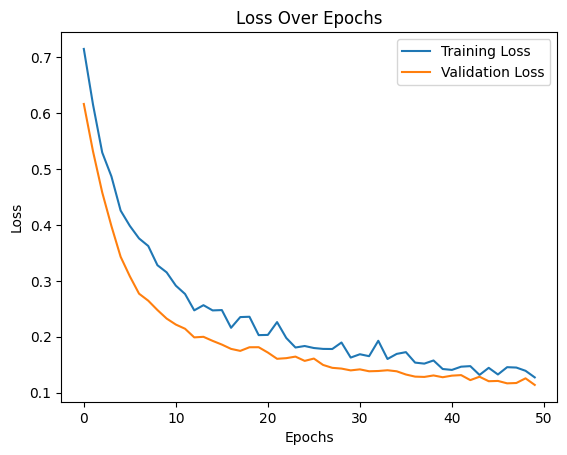

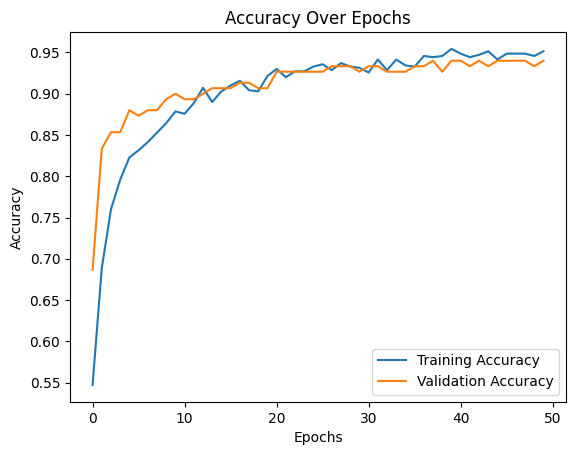

In [45]:

# 훈련 및 검증 손실 시각화
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# 훈련 및 검증 정확도 시각화
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
